In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [259]:
os.getcwd()

'd:\\Vscode\\MyPojects\\TheLook Europe project\\Notebooks'

In [260]:
df = pd.read_csv("../Data/thelook_fr_women_2023_2024.csv")
df.head()

,order_id,order_item_id,product_id,item_created_at,item_status,sale_price,cost,category,department,brand,product_name,order_status,order_created_at,shipped_at,delivered_at,user_id,gender,country,state,city
0,19425,28112,6983,2023-01-01 06:18:03+00:00,Shipped,29.500000,16.048000,Shorts,Women,Fox,Fox Juniors Momentum Short,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
1,19425,28113,10597,2023-01-01 06:44:58+00:00,Shipped,20.000000,10.000000,Intimates,Women,Wacoal,Wacoal Women's B-Smooth Bralette,Shipped,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,NaN,15644,F,France,Centre-Val de Loire,Corquilleroy
2,4710,6730,11792,2023-01-03 04:44:50+00:00,Complete,38.000000,18.468000,Intimates,Women,American Apparel,American Apparel Striped Chiffon Tank,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris
3,16618,24006,329,2023-01-03 15:13:39+00:00,Complete,27.990000,16.402140,Tops & Tees,Women,Tri-Mountain,Tri-Mountain Women's 3/4-Sleeve Pique Knit Pol...,Complete,2023-01-03 18:58:00+00:00,2023-01-05 13:23:00+00:00,2023-01-09 10:25:00+00:00,13422,F,France,Hauts-de-France,Comines
4,4710,6731,5295,2023-01-05 06:43:09+00:00,Complete,56.880001,29.577601,Pants & Capris,Women,Lauren by Ralph Lauren,Lauren Ralph Lauren Velour Pants,Complete,2023-01-03 08:12:00+00:00,2023-01-03 09:14:00+00:00,2023-01-04 03:03:00+00:00,3853,F,France,Île-de-France,Paris


| Nom de la colonne  | Définition                                                      | Type            | Exemple  |
| ------------------ | --------------------------------------------------------------- | --------------- | -------- |
| `order_id`         | Identifiant unique de la commande                               | int             | 16618    |
| `order_item_id`    | Identifiant unique de l’article au sein d’une commande          | int             | 28113    |
| `product_id`       | Identifiant unique du produit                                   | int             | 6983 |
| `item_created_at`  | Date et heure de création de l’article de commande              | date / datetime |2023-01-01 06:18:03|
| `item_status`      | Statut de l’article de commande (ex. en cours, expédié, annulé) | string          | Shipped  |
| `sale_price`       | Prix de vente de l’article                                      | float           |56.880001 |
| `cost`             | Coût d’achat ou de production de l’article                      | float           |18.468000 |
| `category`         | Catégorie du produit                                            | string          |Tops & Tees|
| `department`       | Département auquel appartient le produit                        | string          | Women |
| `brand`            | Marque du produit                                               | string          |American Apparel|
| `product_name`     | Nom du produit                                                  | string          |Fox Juniors Momentum Short|
| `order_status`     | Statut global de la commande                                    | string          |Shipped   |
| `order_created_at` | Date et heure de création de la commande                        | date / datetime | 2022-12-29 10:00:00+00:00 |
| `shipped_at`       | Date et heure d’expédition de la commande                       | date / datetime | 2023-01-05 13:23:00+00:00 |
| `delivered_at`     | Date et heure de livraison de la commande                       | date / datetime |2023-01-04 03:03:00+00:00|
| `user_id`          | Identifiant unique de l’utilisateur ayant passé la commande     | int             | 13422 |
| `gender`           | Genre de l’utilisateur                                          | string          | F |
| `country`          | Pays de résidence de l’utilisateur                              | string          | France |
| `state`            | État ou région de résidence de l’utilisateur                    | string          | Hauts-de-France |
| `city`             | Ville de résidence de l’utilisateur                             | string          | Paris |


Contrôles de qualité

valeurs manquantes

In [261]:
print(df.shape)
df.isna().sum()

(1679, 20)


order_id               0
order_item_id          0
product_id             0
item_created_at        0
item_status            0
sale_price             0
cost                   0
category               0
department             0
brand                  2
product_name           0
order_status           0
order_created_at       0
shipped_at           546
delivered_at        1043
user_id                0
gender                 0
country                0
state                  0
city                   0
dtype: int64

Doublons

In [262]:
df.duplicated().sum()

np.int64(0)

Formats de dates

In [263]:
df.dtypes


order_id              int64
order_item_id         int64
product_id            int64
item_created_at      object
item_status          object
sale_price          float64
cost                float64
category             object
department           object
brand                object
product_name         object
order_status         object
order_created_at     object
shipped_at           object
delivered_at         object
user_id               int64
gender               object
country              object
state                object
city                 object
dtype: object

Les formats date sont catégorisés comme étant des "objets"

In [264]:
date_cols = [
    "order_created_at",
    "shipped_at",
    "delivered_at"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")
df.dtypes


order_id                          int64
order_item_id                     int64
product_id                        int64
item_created_at                  object
item_status                      object
sale_price                      float64
cost                            float64
category                         object
department                       object
brand                            object
product_name                     object
order_status                     object
order_created_at    datetime64[ns, UTC]
shipped_at          datetime64[ns, UTC]
delivered_at        datetime64[ns, UTC]
user_id                           int64
gender                           object
country                          object
state                            object
city                             object
dtype: object

In [265]:
df[date_cols].isna().sum()

order_created_at       0
shipped_at           546
delivered_at        1043
dtype: int64

Cohérence des bornes temporelles

In [266]:
df[date_cols].agg(["min", "max"])

,order_created_at,shipped_at,delivered_at
min,2022-12-29 10:00:00+00:00,2022-12-30 11:29:00+00:00,2023-01-04 03:03:00+00:00
max,2024-12-31 05:13:00+00:00,2025-01-02 02:26:00+00:00,2025-01-02 13:06:00+00:00


Explorations descriptives

In [267]:
df[["sale_price", "cost"]].describe()

,sale_price,cost
count,1679.000000,1679.000000
mean,57.021769,27.460066
std,69.682245,31.854450
min,1.820000,0.749840
25%,19.990000,9.681000
50%,38.000000,18.230800
75%,68.000000,33.232345
max,903.000000,437.052001


distributions (prix de vente, coût)

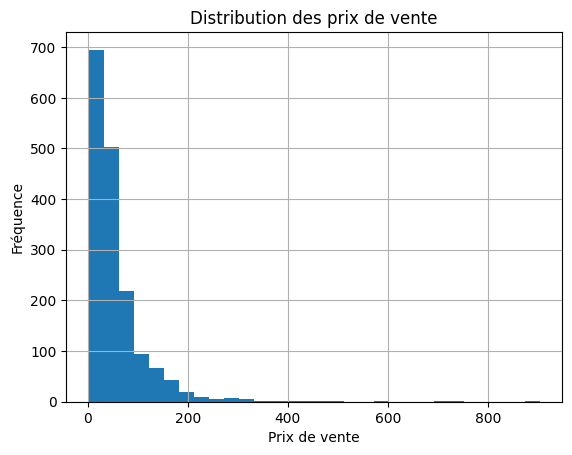

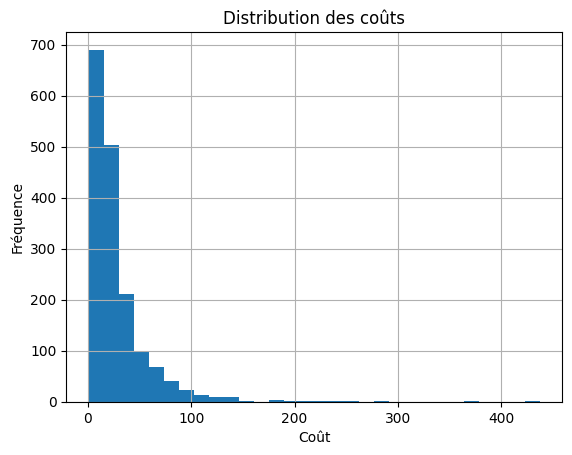

In [268]:
df["sale_price"].hist(bins=30)
plt.title("Distribution des prix de vente")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")
plt.show()

df["cost"].hist(bins=30)
plt.title("Distribution des coûts")
plt.xlabel("Coût")
plt.ylabel("Fréquence")
plt.show()


Contribution par marque

In [269]:
ca_par_marque = (
    df.groupby("brand")["sale_price"]
      .sum()
      .sort_values(ascending=False)
)

ca_par_marque.head(10)

brand
The North Face       2711.990005
Jones New York       2386.479980
7 For All Mankind    2124.490009
Calvin Klein         1851.349998
Ray-Ban              1722.780006
Canada Goose         1445.000000
Allegra K            1304.380003
Robert Rodriguez     1269.000000
Arc'teryx            1168.000000
True Religion        1119.979996
Name: sale_price, dtype: float64

In [270]:
(ca_par_marque / ca_par_marque.sum() * 100)


brand
The North Face       2.834250
Jones New York       2.494065
7 For All Mankind    2.220264
Calvin Klein         1.934811
Ray-Ban              1.800445
                       ...   
Locs                 0.003867
Greatlookz           0.003658
Scarf_tradinginc     0.003313
Skyblue              0.003125
Star                 0.001902
Name: sale_price, Length: 657, dtype: float64

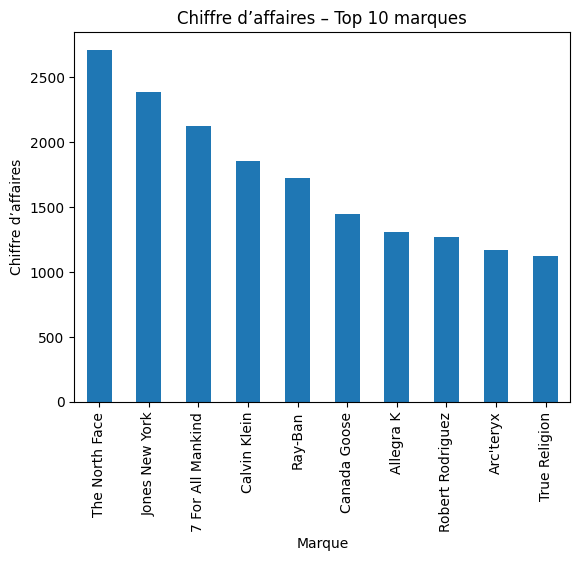

In [271]:
ca_par_marque.head(10).plot(kind="bar")
plt.title("Chiffre d’affaires – Top 10 marques")
plt.xlabel("Marque")
plt.ylabel("Chiffre d’affaires")
plt.show()

In [272]:
ca_par_ville = (
    df.groupby("city")["sale_price"]
      .sum()
      .sort_values(ascending=False)
)

ca_par_ville.head(10)

city
Paris                     4762.090030
Marseille                 2296.680001
Lyon                      1080.810001
Caluire-et-Cuire          1012.849985
Sainte-Gemme-la-Plaine     987.879997
Bègles                     946.400002
Appietto                   903.000000
Locon                      903.000000
Nice                       891.469999
Verdun-sur-Garonne         886.849998
Name: sale_price, dtype: float64

In [273]:
df["month"] = df["order_created_at"].dt.month

In [274]:
ca_par_mois = (
    df.groupby("month")["sale_price"]
      .sum()
)

ca_par_mois

month
1      6125.910012
2      6269.369999
3      4584.579976
4      7476.410015
5      7571.660010
6      9337.400027
7      5929.830009
8      8144.600004
9      9898.720007
10    11823.710015
11     8608.830030
12     9968.530035
Name: sale_price, dtype: float64

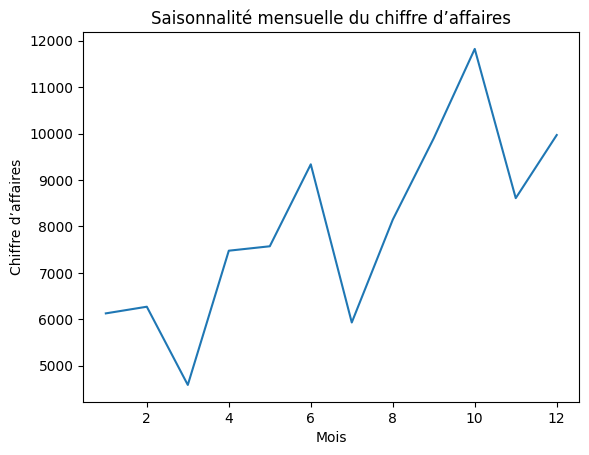

In [275]:
ca_par_mois.plot()
plt.title("Saisonnalité mensuelle du chiffre d’affaires")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires")
plt.show()

In [276]:
df["margin"] = df["sale_price"] - df["cost"]

df["margin"].describe()

count    1679.000000
mean       29.561703
std        38.726316
min         1.070160
25%        10.199455
50%        18.759000
75%        34.261500
max       524.643000
Name: margin, dtype: float64

In [277]:
df.groupby("category")["margin"].mean().sort_values(ascending=False)

category
Outerwear & Coats                93.311644
Blazers & Jackets                52.909113
Dresses                          46.351486
Jeans                            44.851081
Swim                             40.099015
Suits                            38.313418
Sweaters                         37.369445
Skirts                           36.660665
Active                           36.619520
Clothing Sets                    33.267256
Fashion Hoodies & Sweatshirts    26.932312
Pants & Capris                   26.091358
Accessories                      25.912097
Maternity                        24.934332
Jumpsuits & Rompers              24.604958
Sleep & Lounge                   21.566821
Plus                             21.145957
Shorts                           20.015728
Tops & Tees                      17.168500
Intimates                        15.725725
Socks & Hosiery                   9.347237
Leggings                          8.709988
Name: margin, dtype: float64

Comparaison 2023 vs 2024

Préparation des variables temporelles

In [278]:
df["year"] = df["order_created_at"].dt.year
df["month"] = df["order_created_at"].dt.month

In [279]:
df_2324 = df[df["year"].isin([2023, 2024])]

Séries mensuelles chiffre d’affaires

In [280]:
ca_mensuel = (
    df_2324
    .groupby(["year", "month"])["sale_price"]
    .sum()
    .reset_index()
)

In [281]:
ca_pivot = ca_mensuel.pivot(
    index="month",
    columns="year",
    values="sale_price"
)


In [282]:
ca_pivot

year,2023,2024
month,,
1,2315.510011,3810.400001
2,2621.729992,3647.640007
3,2241.819993,2342.759983
4,4050.459992,3425.950023
5,3422.949999,4148.710011
6,3833.690012,5503.710015
7,1959.970003,3969.860006
8,3402.479999,4742.120005
9,4446.080003,5452.640004


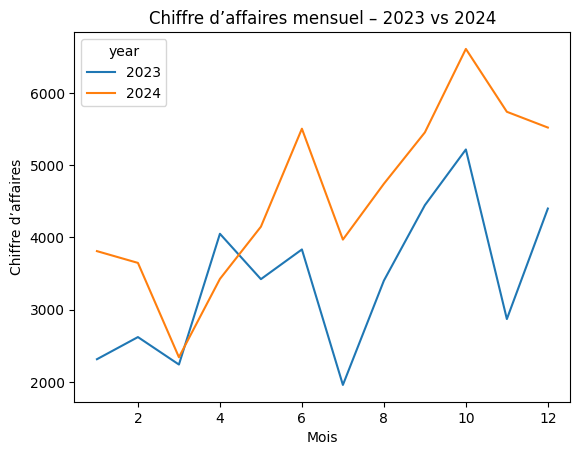

In [283]:
ca_pivot.plot()
plt.title("Chiffre d’affaires mensuel – 2023 vs 2024")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires")
plt.show()


Écarts absolus

In [284]:
ca_pivot["ecart_absolu"] = ca_pivot[2024] - ca_pivot[2023]

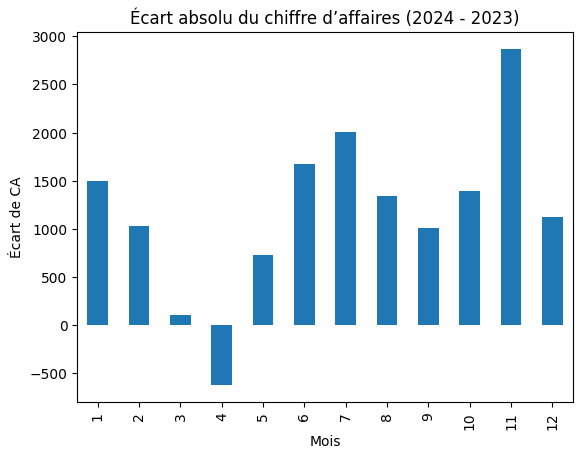

In [285]:
ca_pivot["ecart_absolu"].plot(kind="bar")
plt.title("Écart absolu du chiffre d’affaires (2024 - 2023)")
plt.xlabel("Mois")
plt.ylabel("Écart de CA")
plt.show()

Écarts relatifs

In [286]:
ca_pivot["ecart_relatif"] = (
    ca_pivot["ecart_absolu"] / ca_pivot[2023] * 100
)

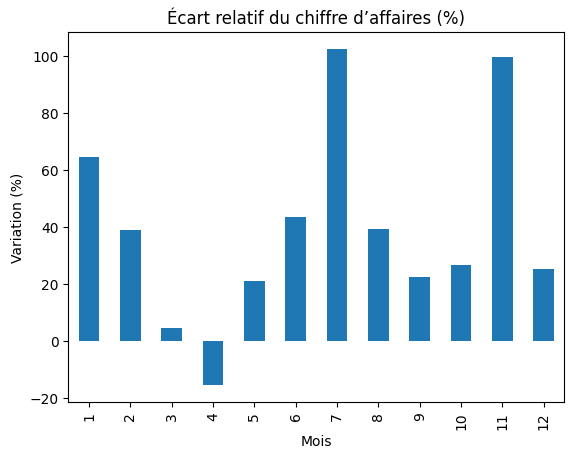

In [287]:
ca_pivot["ecart_relatif"].plot(kind="bar")
plt.title("Écart relatif du chiffre d’affaires (%)")
plt.xlabel("Mois")
plt.ylabel("Variation (%)")
plt.show()

Identification des ruptures

In [288]:
seuil_pic = ca_pivot["ecart_relatif"].mean() + 2 * ca_pivot["ecart_relatif"].std()
seuil_creux = ca_pivot["ecart_relatif"].mean() - 2 * ca_pivot["ecart_relatif"].std()

pics = ca_pivot[ca_pivot["ecart_relatif"] > seuil_pic]
creux = ca_pivot[ca_pivot["ecart_relatif"] < seuil_creux]

In [289]:
pics, creux

(Empty DataFrame
 Columns: [2023, 2024, ecart_absolu, ecart_relatif]
 Index: [],
 Empty DataFrame
 Columns: [2023, 2024, ecart_absolu, ecart_relatif]
 Index: [])

Aucune marque n’a une variation relative suffisamment extrême pour dépasser ±2 écarts-types.

On peut donc supposer que les variations de chiffre d'affaires entre 2023 et 2024 sont modérées et comparables entre les marques

KPI

In [290]:
# Vérification des statuts présents
df["order_status"].value_counts()
df["item_status"].value_counts()

item_status
Shipped       497
Complete      425
Processing    306
Cancelled     240
Returned      211
Name: count, dtype: int64

Chiffre d’affaires (CA)

In [291]:
ventes = df[df["sale_price"] > 0]
chiffre_affaires = ventes["sale_price"].sum()
chiffre_affaires

np.float64(95739.55013930798)

Marge brute

In [292]:
marge_brute = (ventes["sale_price"] - ventes["cost"]).sum()
marge_brute

np.float64(49634.099091196986)

Panier moyen

In [293]:
nb_commandes = ventes["order_id"].nunique()
panier_moyen = chiffre_affaires / nb_commandes
panier_moyen

np.float64(85.7113251023348)

Taux de retour

In [294]:
lignes_retournees = df[df["item_status"] == "Returned"]
lignes_vendues_ou_retournees = df[df["item_status"].isin(["Complete", "Returned"])]

taux_retour = len(lignes_retournees) / len(lignes_vendues_ou_retournees)
taux_retour

0.33176100628930816

Taux de ré-achat (annuel)

In [295]:
# Commandes complètes uniquement
commandes_completes = df[df["item_status"] == "Complete"].copy()

# Extraction de l'année
commandes_completes["year"] = commandes_completes["order_created_at"].dt.year

# Nombre de commandes par client et par an
commandes_par_client = (
    commandes_completes
    .groupby(["user_id", "year"])["order_id"]
    .nunique()
    .reset_index(name="nb_commandes")
)

# Clients avec au moins 2 commandes sur l'année
clients_reachat = commandes_par_client[commandes_par_client["nb_commandes"] >= 2]

# Taux de ré-achat
taux_reachat = (
    clients_reachat["user_id"].nunique()
    / commandes_completes["user_id"].nunique()
)
taux_reachat

0.022556390977443608

In [296]:
taux_reachat * 100

2.2556390977443606

In [297]:
kpi = {
    "Chiffre d’affaires": chiffre_affaires,
    "Marge brute": marge_brute,
    "Panier moyen": panier_moyen,
    "Taux de retour (%)": taux_retour * 100
}

kpi

{'Chiffre d’affaires': np.float64(95739.55013930798),
 'Marge brute': np.float64(49634.099091196986),
 'Panier moyen': np.float64(85.7113251023348),
 'Taux de retour (%)': 33.17610062893082}

In [298]:


# 1. Ventes complètes uniquement
ventes = df[
    (df["item_status"] == "Complete") &
    (df["sale_price"] > 0)
]

# CA
chiffre_affaires = ventes["sale_price"].sum()
chiffre_affaires


np.float64(23522.600014328957)